### Importing Dependencies

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')  #grabbing gpus
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf

In [3]:
import tensorflow_datasets as tfds #for importing dataset
from matplotlib import pyplot as plt #for plotting dataset

In [4]:
ds = tfds.load('fashion_mnist', split = 'train')

In [5]:
ds.as_numpy_iterator().next()  #image as numpy array #grabbing data
#we make call to dataset pipeline to bring data back
#to bring data we need to setup itterator

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [6]:
ds.as_numpy_iterator().next()['label']  #image as numpy array

2

### Visualizing Dataset

In [7]:
import numpy as np #for data transformation
##setting/ building up itterator

In [8]:
#itterator
diterator = ds.as_numpy_iterator()
#now we could just use diterator.next() to call batch of images

In [9]:
diterator.next()   #calls different image and its label everytime from the tensorflow dataset piple
#data is not stored in the memory
#preserves memory

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [10]:
diterator.next()['image'].shape #image shape

(28, 28, 1)

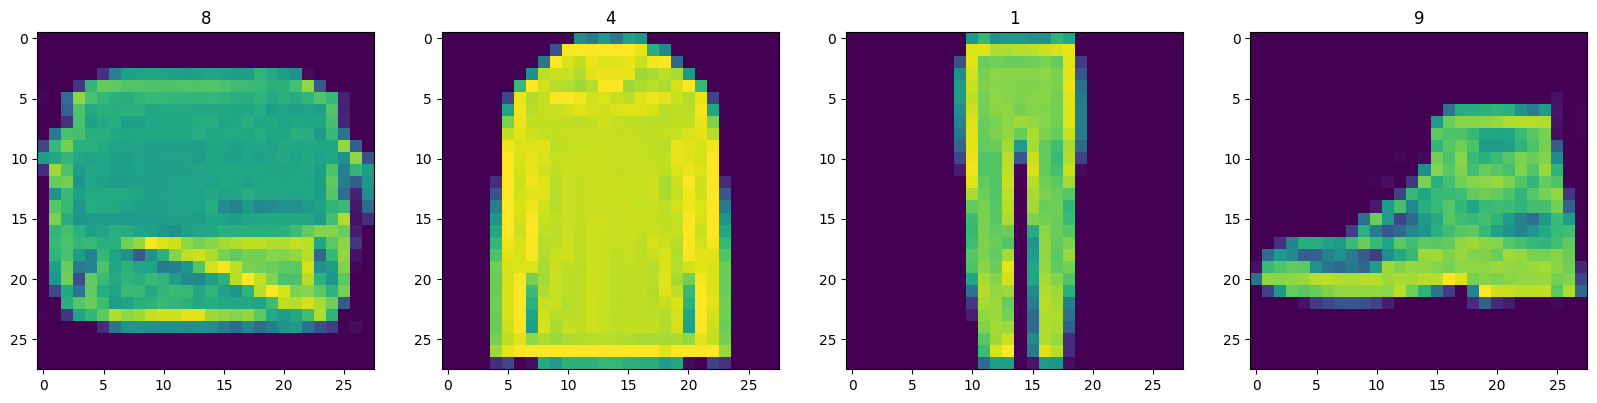

In [11]:
#setting up subplot
fig, ax = plt.subplots(ncols = 4,  figsize= (20,20)) #fig is the whole thing ax is the subplot

for i in range(4):
    batch = diterator.next() #sample dict -  image, label from dataset
    ax[i].imshow(np.squeeze(batch['image'])) # plotting image
    ax[i].title.set_text(batch['label']) # adding label as title

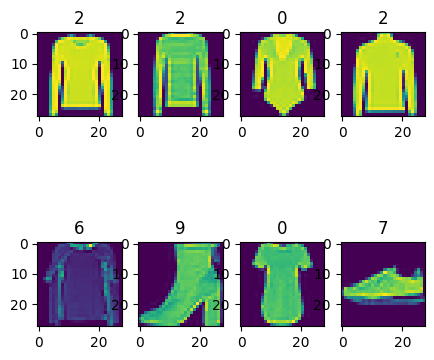

In [12]:
fig, ax = plt.subplots(ncols = 4, nrows = 2,  figsize= (5,5))
for i in range(2):
    for j in range(4):
        batch = diterator.next()
        ax[i][j].imshow(np.squeeze(batch['image'])) # plotting image
        ax[i][j].title.set_text(batch['label']) #plotting label

In [13]:
ax

array([[<Axes: title={'center': '2'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '0'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '0'}>, <Axes: title={'center': '7'}>]],
      dtype=object)

### Image prerocessing  

In [14]:
def scale_image(data):  #image scaling (0,1)
    image = data['image']
    return image/255

Intialization,
* M - Map our dataset
* C - Cache
* B - Batch our dataset
* P - Prefetch
* S - Shuffle

In [15]:
ds = ds.map(scale_image) #mapping scale function to the images
#data augmentation could also be applied
#Cache the dataset
ds = ds.cache()
#shuffling the dataset shuffle buffer = 60000
ds = ds.shuffle(60000)
#creating batch
ds = ds.batch(128)
#eliminates bottlenecking - eliminates likelihood of bottlenecking
ds = ds.prefetch(64)

In [18]:
ds.as_numpy_iterator().next().shape  #128 images - batch size of size 28, 82, 1 - (128,28,28,1)
#later batch size changed to 64->128(back)

(128, 28, 28, 1)

### Building the network

#### Importing model dependencies

In [19]:
#importing tensorflow sequential api for building model
#1 input 1 output
from tensorflow.keras.models import Sequential
# layer components for building the network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, Dropout, UpSampling2D, LeakyReLU

### Generator Model
Generates Fashion Images from random values.

In [20]:
def build_generator():
    model  = Sequential()
    #128 values as input -> (28,28,1)
    #first block 128 values - > (7,7,128)
    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))   #first block

    #upsampling block - 1
    #upsampling by factor of 2 (7,7,128) -> (14,14,128)
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding ='same'))
    model.add(LeakyReLU(0.2))

    #upsampling block- 2

    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding ='same'))
    model.add(LeakyReLU(0.2))

    #output layer
    #model.add(UpSampling2D())
    # model.add(Conv2D(1, 5, padding ='same'))
    # model.add(LeakyReLU(0.2))

    #instead addong more layers for more information
    #more knowledge to learn better

    #conv block- 1 (conv)

    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))

    #conv block- 2 (conv)

    model.add(Conv2D(128, 4, padding = 'same'))
    model.add(LeakyReLU(0.2))

    #conv layer to get back to one channel

    model.add(Conv2D(1, 4, padding = 'same', activation = 'sigmoid'))

    return model

In [21]:
gen = build_generator()

In [22]:
gen.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [23]:
gen = build_generator()
img = gen.predict(np.random.randn(4,128))  #4- how many images we want to generate
img

1/1 [==============================] - 2s 2s/step


array([[[[0.50925785],
         [0.50952744],
         [0.50637174],
         ...,
         [0.51149833],
         [0.5048267 ],
         [0.50387233]],

        [[0.51498336],
         [0.5171096 ],
         [0.517908  ],
         ...,
         [0.51090765],
         [0.50614333],
         [0.5075275 ]],

        [[0.51718956],
         [0.5186786 ],
         [0.5222042 ],
         ...,
         [0.5108257 ],
         [0.50680315],
         [0.5077209 ]],

        ...,

        [[0.50190175],
         [0.5115354 ],
         [0.5157944 ],
         ...,
         [0.4982168 ],
         [0.50183046],
         [0.5043624 ]],

        [[0.50370705],
         [0.50387406],
         [0.5051841 ],
         ...,
         [0.5044858 ],
         [0.50239813],
         [0.50413793]],

        [[0.50367796],
         [0.5023754 ],
         [0.49986658],
         ...,
         [0.50365824],
         [0.50163466],
         [0.50163007]]],


       [[[0.5098621 ],
         [0.5048547 ],
         [0.50

In [24]:
gen = build_generator()
img = gen.predict(np.random.randn(4,128,1))  #4- how many images we want to generate
img.shape

1/1 [==============================] - 0s 84ms/step


(4, 28, 28, 1)

In [25]:
img.shape

(4, 28, 28, 1)

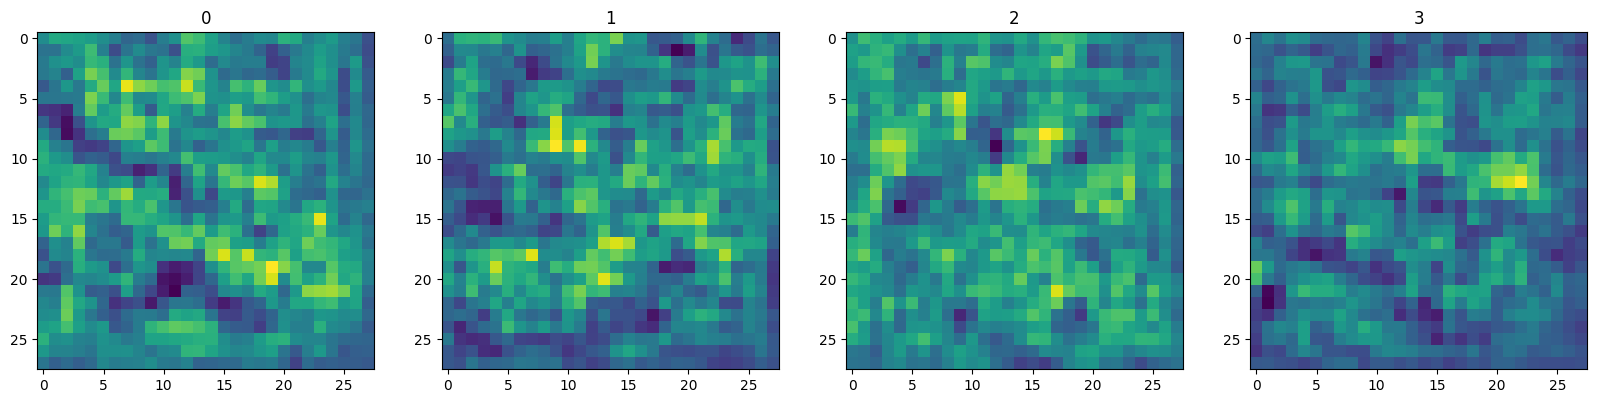

In [26]:
#setting up subplot
fig, ax = plt.subplots(ncols = 4,  figsize= (20,20)) #fig is the whole thing ax is the subplot

for i, im in enumerate(img):
    ax[i].imshow(np.squeeze(im)) # plotting image
    ax[i].title.set_text(i)

#### Discriminator Model
Take in generated images and real images and classify as real or fake

In [27]:
def build_discriminator():
    model = Sequential()

    #first conv block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #second conv block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #third conv block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #third conv block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    #flatten and pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'sigmoid'))  #1 - false image 0 - true image

    return model

In [28]:
discriminator = build_discriminator()

In [29]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

In [30]:
img.shape

(4, 28, 28, 1)

In [31]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [32]:
preds = discriminator.predict(img)

1/1 [==============================] - 0s 286ms/step


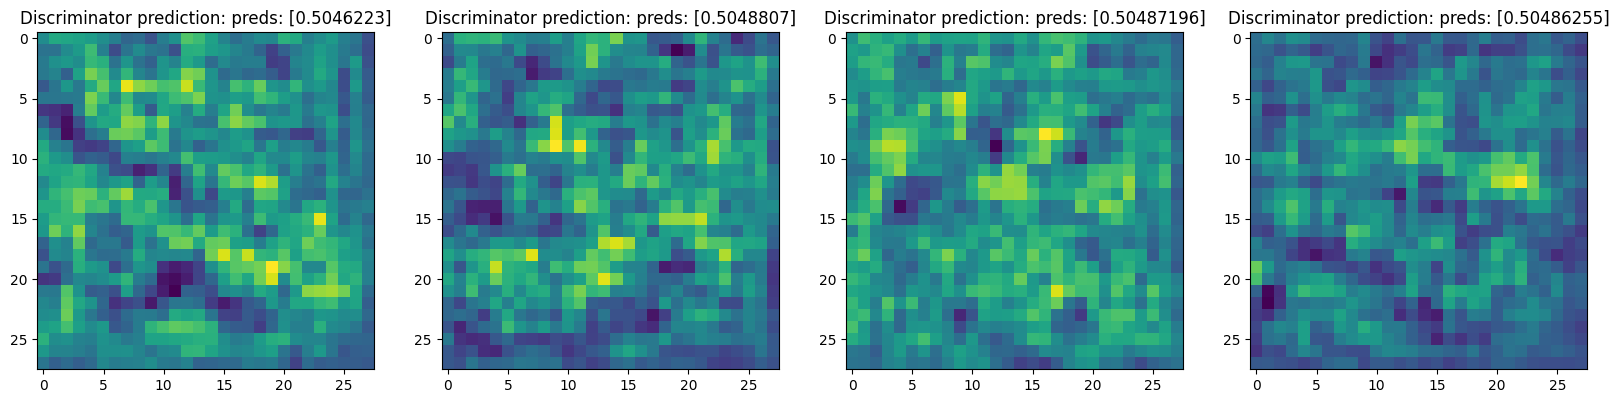

In [33]:
#setting up subplot
fig, ax = plt.subplots(ncols = 4,  figsize= (20,20)) #fig is the whole thing ax is the subplot

for i, im in enumerate(img):
    ax[i].imshow(np.squeeze(im)) # plotting image
    ax[i].title.set_text(f'Discriminator prediction: preds: {preds[i]}')

In [34]:
discriminator.predict(ds.as_numpy_iterator().next()) #running discriminator on images from itterator

4/4 [==============================] - 0s 4ms/step


array([[0.50346774],
       [0.50774163],
       [0.5059657 ],
       [0.50243235],
       [0.50217587],
       [0.50878143],
       [0.5019664 ],
       [0.50315917],
       [0.5078406 ],
       [0.5036176 ],
       [0.5012866 ],
       [0.5017109 ],
       [0.502582  ],
       [0.5018383 ],
       [0.5042957 ],
       [0.50213385],
       [0.50227654],
       [0.5025763 ],
       [0.5028146 ],
       [0.5017775 ],
       [0.5075609 ],
       [0.49932334],
       [0.5005623 ],
       [0.50313866],
       [0.5064129 ],
       [0.5046596 ],
       [0.504846  ],
       [0.5061501 ],
       [0.5019968 ],
       [0.502768  ],
       [0.5063163 ],
       [0.50092536],
       [0.5024874 ],
       [0.50220275],
       [0.5040108 ],
       [0.5058255 ],
       [0.49956876],
       [0.50300986],
       [0.50257635],
       [0.5026214 ],
       [0.503527  ],
       [0.50233847],
       [0.50515664],
       [0.5061354 ],
       [0.5018495 ],
       [0.5039549 ],
       [0.49977568],
       [0.501

### Constructing Training loop

#### Setting up Losses and optimizers

In [49]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [63]:
#instances
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)  #we dont want discriminator to learn too fast and overtake generator while training (limiting discriminator learning)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

#### Building Subclassed Model

In [64]:
#importing base model class to subclass
from tensorflow.keras.models import Model

In [65]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)

        #create attributes for gen and discriminator
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        #complie with base class
        super().compile(*args, **kwargs)

        #create attributes for losses and optimizers
        self.g_opt = g_opt
        self.g_loss = g_loss
        self.d_opt = d_opt
        self.d_loss = d_loss

    def train_step(self, batch):   #batch - (128,28,28,1)
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)), training = False)  #batch size chnage
        #train the discriminator
        with tf.GradientTape() as d_tape:    #to calculate gradients monitoring functions

            #pass real and fake images to the discriminator
            yhat_real = self.discriminator(real_images, training = True)   #training =true dropout activates
            yhat_fake = self.discriminator(fake_images, training = True)    #training =true dropout activates
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

            #create labels for real and fake images - since it is supervised training
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)  #real image = 0, fake = 1

            #add some noise to the actual labels to make the discriminator learn slower-less certainity to discriminator whether its predicting correctly or not
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real,noise_fake], axis=0)

            #calculate the loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        #apply backpropagation
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)  #to calculate gradient wrt loss, 2nd parameter is to calulate gradient for each of the trainable variables
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))  #to apply  backprop to gradients, 2nd parameter is to calulate gradient for each of the trainable variables


        #generator training

        with tf.GradientTape() as g_tape:
            #Generate new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training = True)  #batch size change

            #create the predicted labels
            #tricking discriminator that the images are real by giving them label 0
            predicted_labels = self.discriminator(gen_images, training = False)

            #calculate loss by faking out the discriminator
            total_g_loss  = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
            #implying that generated images are actually REAL images

        #apply back prop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)  #to calculate gradient wrt loss, 2nd parameter is to calulate gradient for each of the trainable variables
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))  #to apply  backprop to gradients, 2nd parameter is to calulate gradient for each of the trainable variables

        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [66]:
#exp
# generator = build_generator()
# fake_images = generator(tf.random.normal((128,128)), training = False)
# fake_images.shape

In [67]:
#other way
# @tf.function
# def train_step():


In [68]:
#instancing the model
generator = build_generator()
discriminator = build_discriminator()
fashionGAN = FashionGAN(generator, discriminator)

In [69]:
#compile the model
fashionGAN.compile(g_opt, d_opt, g_loss, d_loss)

#### Building the callback

In [70]:
!pwd

/content


In [71]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [72]:
class ModelMonitor(Callback):  ##will help save examples of the images along the training
    def __init__(self, num_img = 3, latent_dim=128):   #how many images to generate and the latent dimension (input dim)
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):  #once epoch ends it will generate the image and save it
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('generated images', f'generated_img_{epoch}_{i}.png'))

#### Traning

In [73]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [74]:
#recommended epochs - 2000
hist = fashionGAN.fit(ds, epochs = 30,  callbacks=[ModelMonitor()])

Epoch 1/30
469/469 [==============================] - 78s 154ms/step - d_loss: 0.4567 - g_loss: 1.2504
Epoch 2/30
469/469 [==============================] - 74s 157ms/step - d_loss: 0.4877 - g_loss: 2.9134
Epoch 3/30
469/469 [==============================] - 74s 158ms/step - d_loss: 0.6478 - g_loss: 0.6658
Epoch 4/30
469/469 [==============================] - 75s 160ms/step - d_loss: 0.5024 - g_loss: 0.1736
Epoch 5/30
469/469 [==============================] - 75s 160ms/step - d_loss: 0.4367 - g_loss: 0.0235
Epoch 6/30
469/469 [==============================] - 75s 160ms/step - d_loss: 0.7186 - g_loss: 0.5137
Epoch 7/30
469/469 [==============================] - 75s 160ms/step - d_loss: 0.6916 - g_loss: 0.5315
Epoch 8/30
469/469 [==============================] - 75s 160ms/step - d_loss: 0.6979 - g_loss: 0.6130
Epoch 9/30
469/469 [==============================] - 75s 160ms/step - d_loss: 0.6830 - g_loss: 0.6380
Epoch 10/30
469/469 [==============================] - 75s 160ms/step - d

KeyboardInterrupt: ignored

In [75]:
!zip -r /content/genimg.zip /content/generated\ images

  adding: content/generated images/ (stored 0%)
  adding: content/generated images/generated_img_5_1.png (stored 0%)
  adding: content/generated images/generated_img_11_0.png (stored 0%)
  adding: content/generated images/generated_img_0_2.png (stored 0%)
  adding: content/generated images/generated_img_3_0.png (stored 0%)
  adding: content/generated images/generated_img_11_1.png (stored 0%)
  adding: content/generated images/generated_img_0_1.png (stored 0%)
  adding: content/generated images/generated_img_7_0.png (stored 0%)
  adding: content/generated images/generated_img_7_1.png (stored 0%)
  adding: content/generated images/generated_img_3_1.png (stored 0%)
  adding: content/generated images/generated_img_4_0.png (stored 0%)
  adding: content/generated images/generated_img_10_2.png (stored 0%)
  adding: content/generated images/generated_img_11_2.png (stored 0%)
  adding: content/generated images/generated_img_2_0.png (stored 0%)
  adding: content/generated images/generated_img_9_

In [76]:
from google.colab import files
files.download("/content/genimg.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>